# (필수 예제) 거북이 그래픽

**참고**

[사례 연구: 함수 인터페이스](https://codingalzi.github.io/pybook/casestudy_function_interfaces.html)에서
소개한 함수들과 관련된다.

**주의 사항**

거북이 코드는 구글 코랩에서 지원되지 않는다.
대신 개인 컴퓨터에 설치된 [IDLE 를 이용](https://aisw.tistory.com/5)하거나 [Trinket](https://trinket.io/) 을 이용할 것을 추천한다.

**문제 1**

회오리 모양으로 움직이면서 점차 가속도가 붙는 거북이를 그리는 
`whirl_turtle()` 함수를 구현한 후에 실행하라.

힌트: `pendown()`, `penup()`, `stamp()` 메서드 활용

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/pybook/master/jupyter-book/images/turtle06.png" width="300"/></div>

In [ ]:
# pass 를 적절한 명령문으로 대체하라.

import turtle
wn = turtle.Screen()
wn.bgcolor("lightyellow")
bob = turtle.Turtle()
bob.shape("turtle")        # 화살촉 대신 거북이 모양 선택
bob.color("blue")
bob.hideturtle()
bob.penup()
bob.shapesize(0.5)

# n 은 거북이의 수
def whirl_turtle(t,n):
    x=5
    y=5
    for i in range(n):
        t.stamp()
        t.speed(x)
        t.forward(y)
        t.right(30)
        x+=5
        y+=4

whirl_turtle(bob,25)

wn.mainloop()

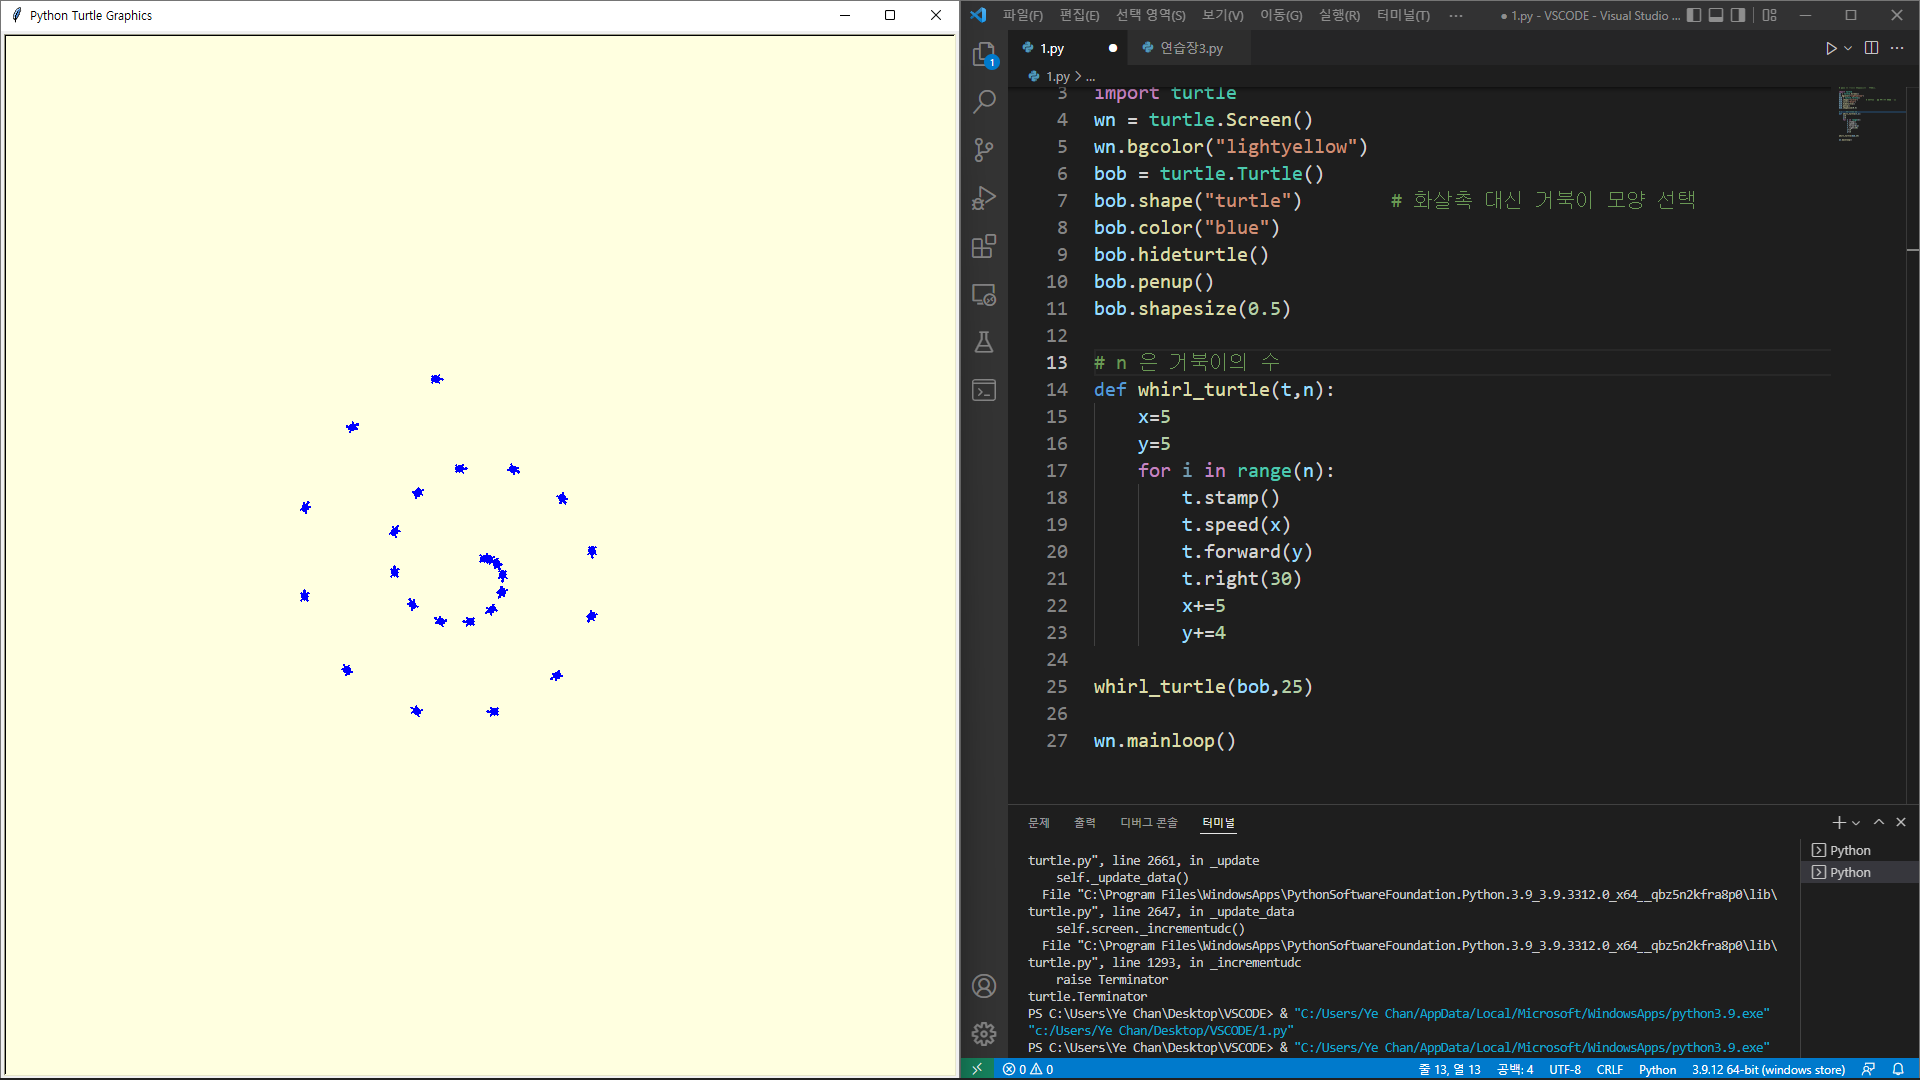

**문제 2**

(1) 아래 그림의 도형을 그리는 함수들을 구현하고 실행하라.

힌트: `arc()` 함수 이용

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/pybook/master/jupyter-book/images/turtle05-1.png" width="300"/></div>

In [ ]:
import math
import turtle as t
wn = t.Screen()      # 캔버스 하나 생성
bob = t.Turtle()    # bob 란 이름의 거북이 하나 생성. 기본 모양은 화살촉
bob.hideturtle()
bob.speed(0)

def polyline(t, n, length, angle):
    for i in range(n):
        t.fd(length)
        t.lt(angle)

def arc(t, r, angle):
    arc_length = 2 * math.pi * r * angle / 360
    n = int(arc_length / 3) + 1
    step_length = arc_length / n
    step_angle = float(angle) / n
    
    polyline(t, n, step_length, step_angle)


#arc 함수를 활용해서 꽃잎 만들기
def leaf(t,r,angle):
        arc(t,r,angle)
        t.lt(180-angle)
        arc(t,r,angle)

#꽃잎 합쳐서 꽃 만들기
def flower(t,r,angle,a):
    d=360/a
    x=0
    for i in range(a):
        leaf(bob,r,angle)
        t.seth(x)
        t.lt(d)
        x+=d

bob.penup()
bob.goto(-200,0)
bob.pendown()
flower(bob,70,60,7)

bob.penup()
bob.goto(0,0)
bob.pendown()
flower(bob,55,70,10)

bob.penup()
bob.goto(200,0)
bob.pendown()
flower(bob,250,15,20)


wn.mainloop()             # X 버튼을 눌러 창을 닫을 때까지 대기

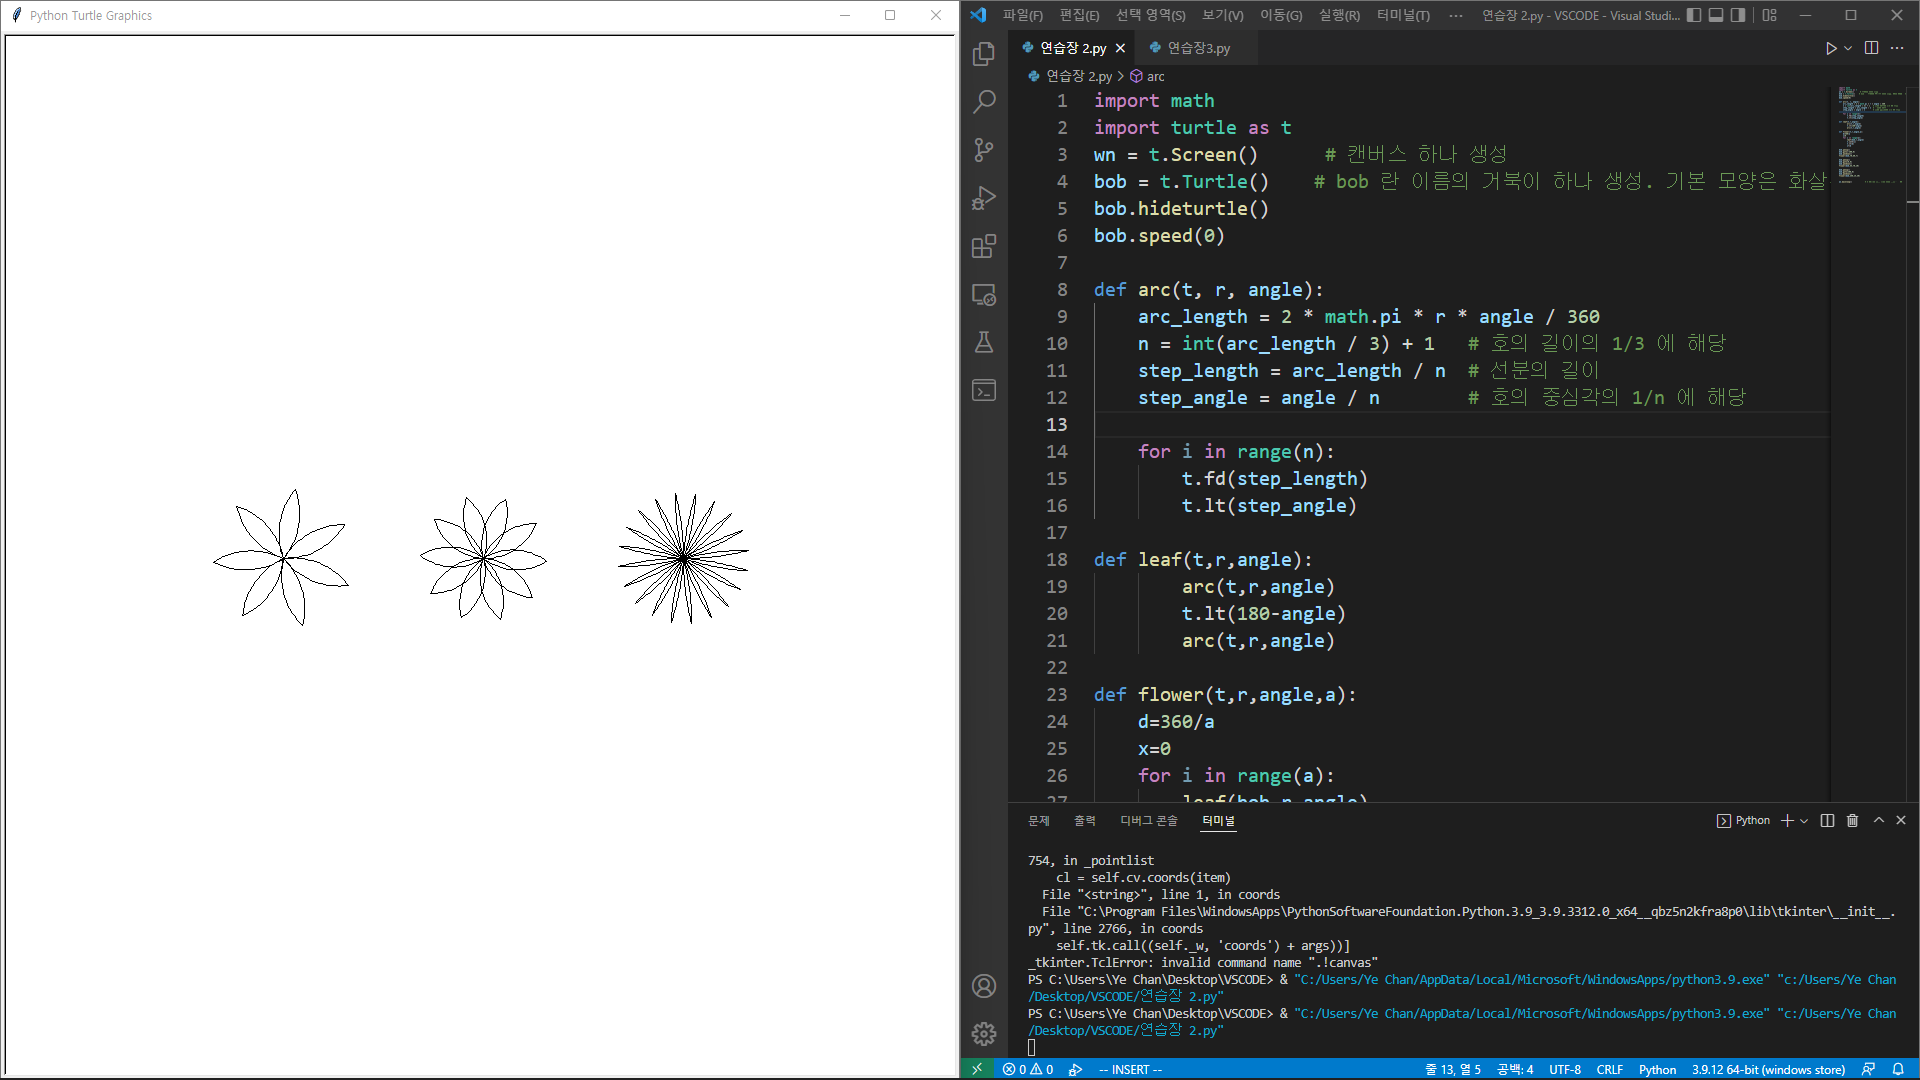

(2) [여기](http://thinkpython2.com/code/polygon.py)에 정의되어 있는
`arc()` 함수와 차이점을 예제를 이용하여 설명하라.

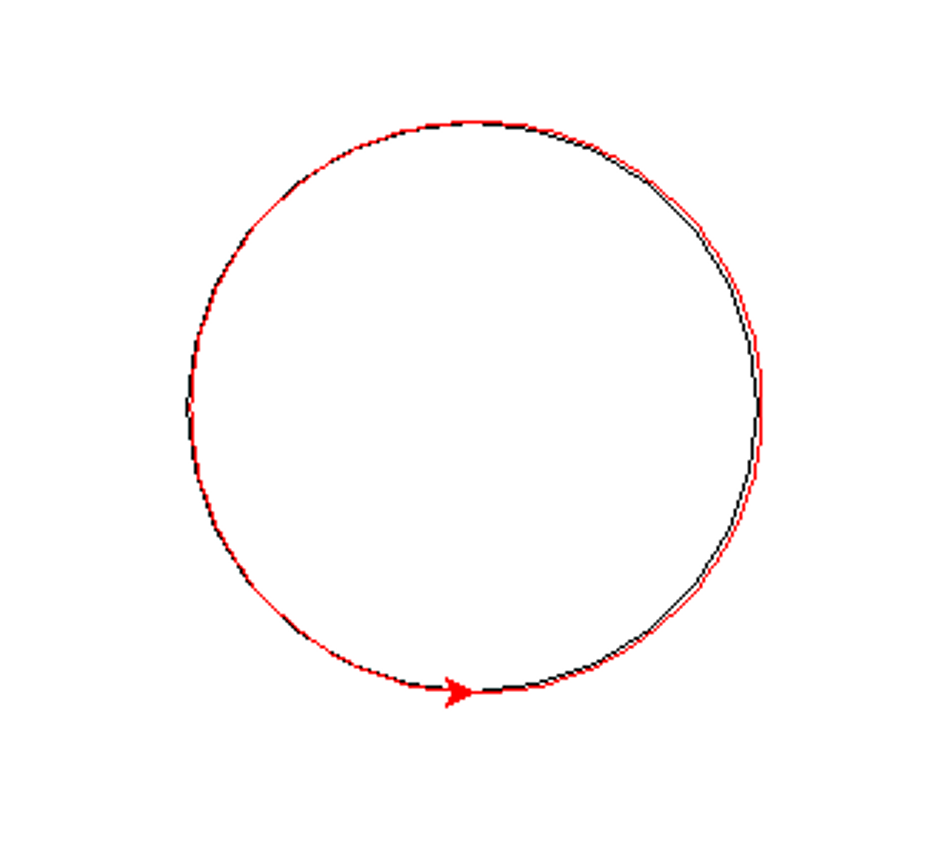

circle() 함수로 그린 검은색 원 위에 수업 자료에 있던 arc()함수를 활용하여 같은 크기의 원을 그려봤습니다.

보시는것처럼 빨간 원이 약간의 각도로 오른쪽으로 기울어져있습니다.

arc()함수가 원을 그리는 방식을 부분적으로 보면
polyline을 실행하는 부분에서 시작하자마자 앞으로 이동한다음 각도를 바꾸는것을 확인할수 있습니다.





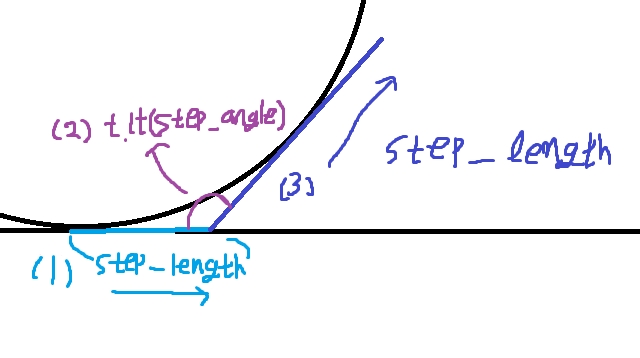


그렇기에 조정되지 않은 상태로 시작을 하게 되면 방향전환을 하기 전에 step_length만큼 이동하게 됩니다.


따라서 항상 원래 만들려는 모양보다 미세하게 오른쪽으로 치우쳐진 상태로 만들어지게 됩니다.

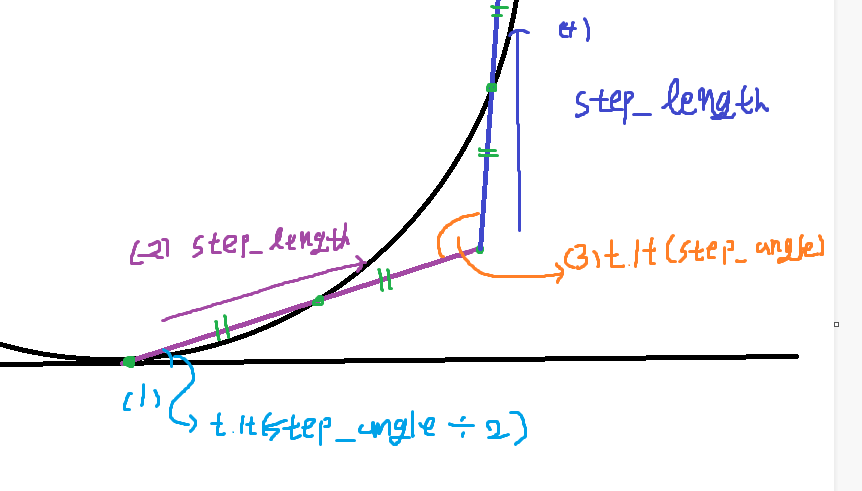

반면에 링크에 있는 arc()함수는 polyline을 그리기 전에 왼쪽으로 step_angle의 절반만큼 회전하고 시작해서 step_length의 반은 원의 안쪽에 들어가고, 반은 바깥에 나온 상태로 만들어지게 됩니다.

수업에서 사용했던 arc()함수는 전부 원의 바깥에서 polyline이 형성되고 있고,

링크에 나와있는 arc()함수는 반은 원의 안에서, 반은 원의 밖에서 polyline()이 형성되어있기 때문에
링크에 나와있는 arc()함수가 더 원에 근사한 도형을 그리게 됩니다.

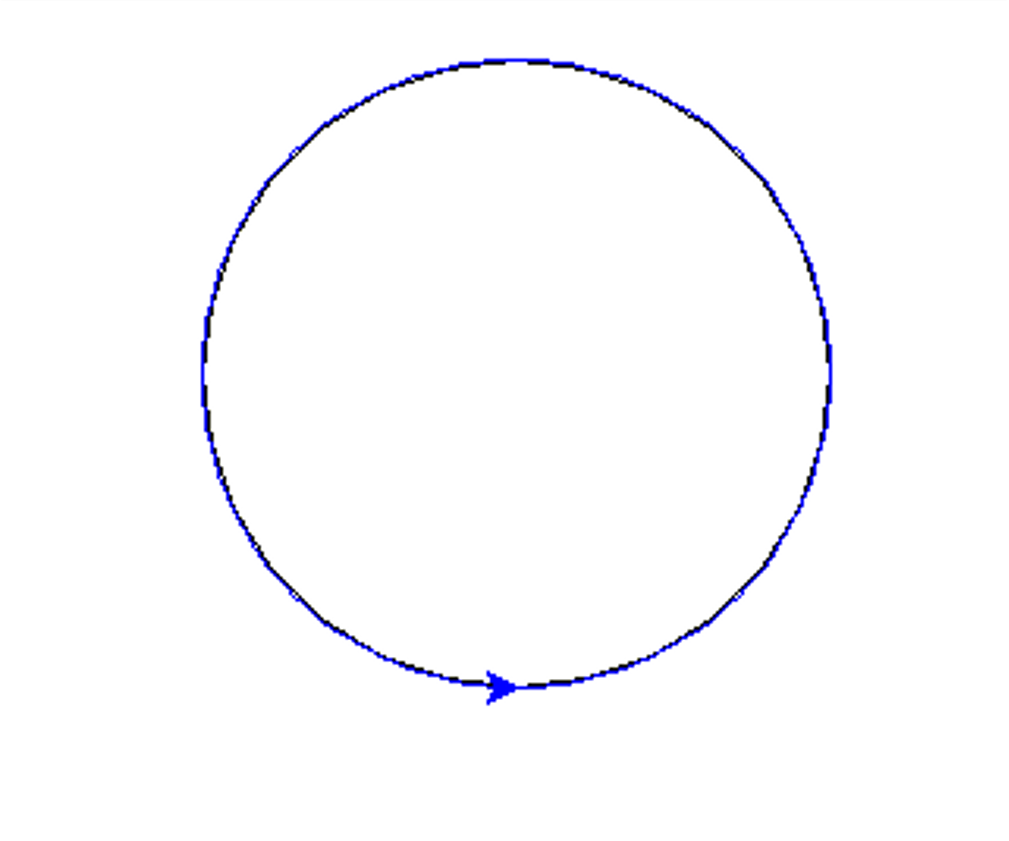

(circle()함수로 그린 검은 원 위에 링크에 있는 arc()함수로 그린 파란 원 - 오차가 거의 없다. )

**문제 3**

아래 그림의 도형을 그리는 함수들을 구현하라.
<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/pybook/master/jupyter-book/images/turtle04-1.png" width="300"/></div>

In [ ]:
import math
import turtle as t
wn = t.Screen()      # 캔버스 하나 생성
bob = t.Turtle()    # bob 란 이름의 거북이 하나 생성. 기본 모양은 화살촉
bob.hideturtle()
bob.speed(0)

# 이등변 삼각형 구현하기    
def isosceles_triangle(t, n, length):
    angle = 2*math.pi/n
    t.fd( (length/2)/math.sin(angle/2) )
    t.lt( 180- ((180-(360/n))/2) )
    t.fd(length)
    t.lt( 180- ((180-(360/n))/2) )
    t.fd( (length/2)/math.sin(angle/2) )

#이등변 삼각형합쳐서 n각형 만들기
def make(t,n,length):
    t.rt(180/n)
    for i in range(n):
        isosceles_triangle(t,n,length)
        t.lt(180)


bob.penup()
bob.goto(-200,0)
bob.pendown()
bob.seth(0)
make(bob,5,95)

bob.penup()
bob.goto(0,0)
bob.pendown()
bob.seth(0)
make(bob,6,80)

bob.penup()
bob.goto(200,0)
bob.pendown()
bob.seth(0)
make(bob,7,70)


wn.mainloop()             # X 버튼을 눌러 창을 닫을 때까지 대기

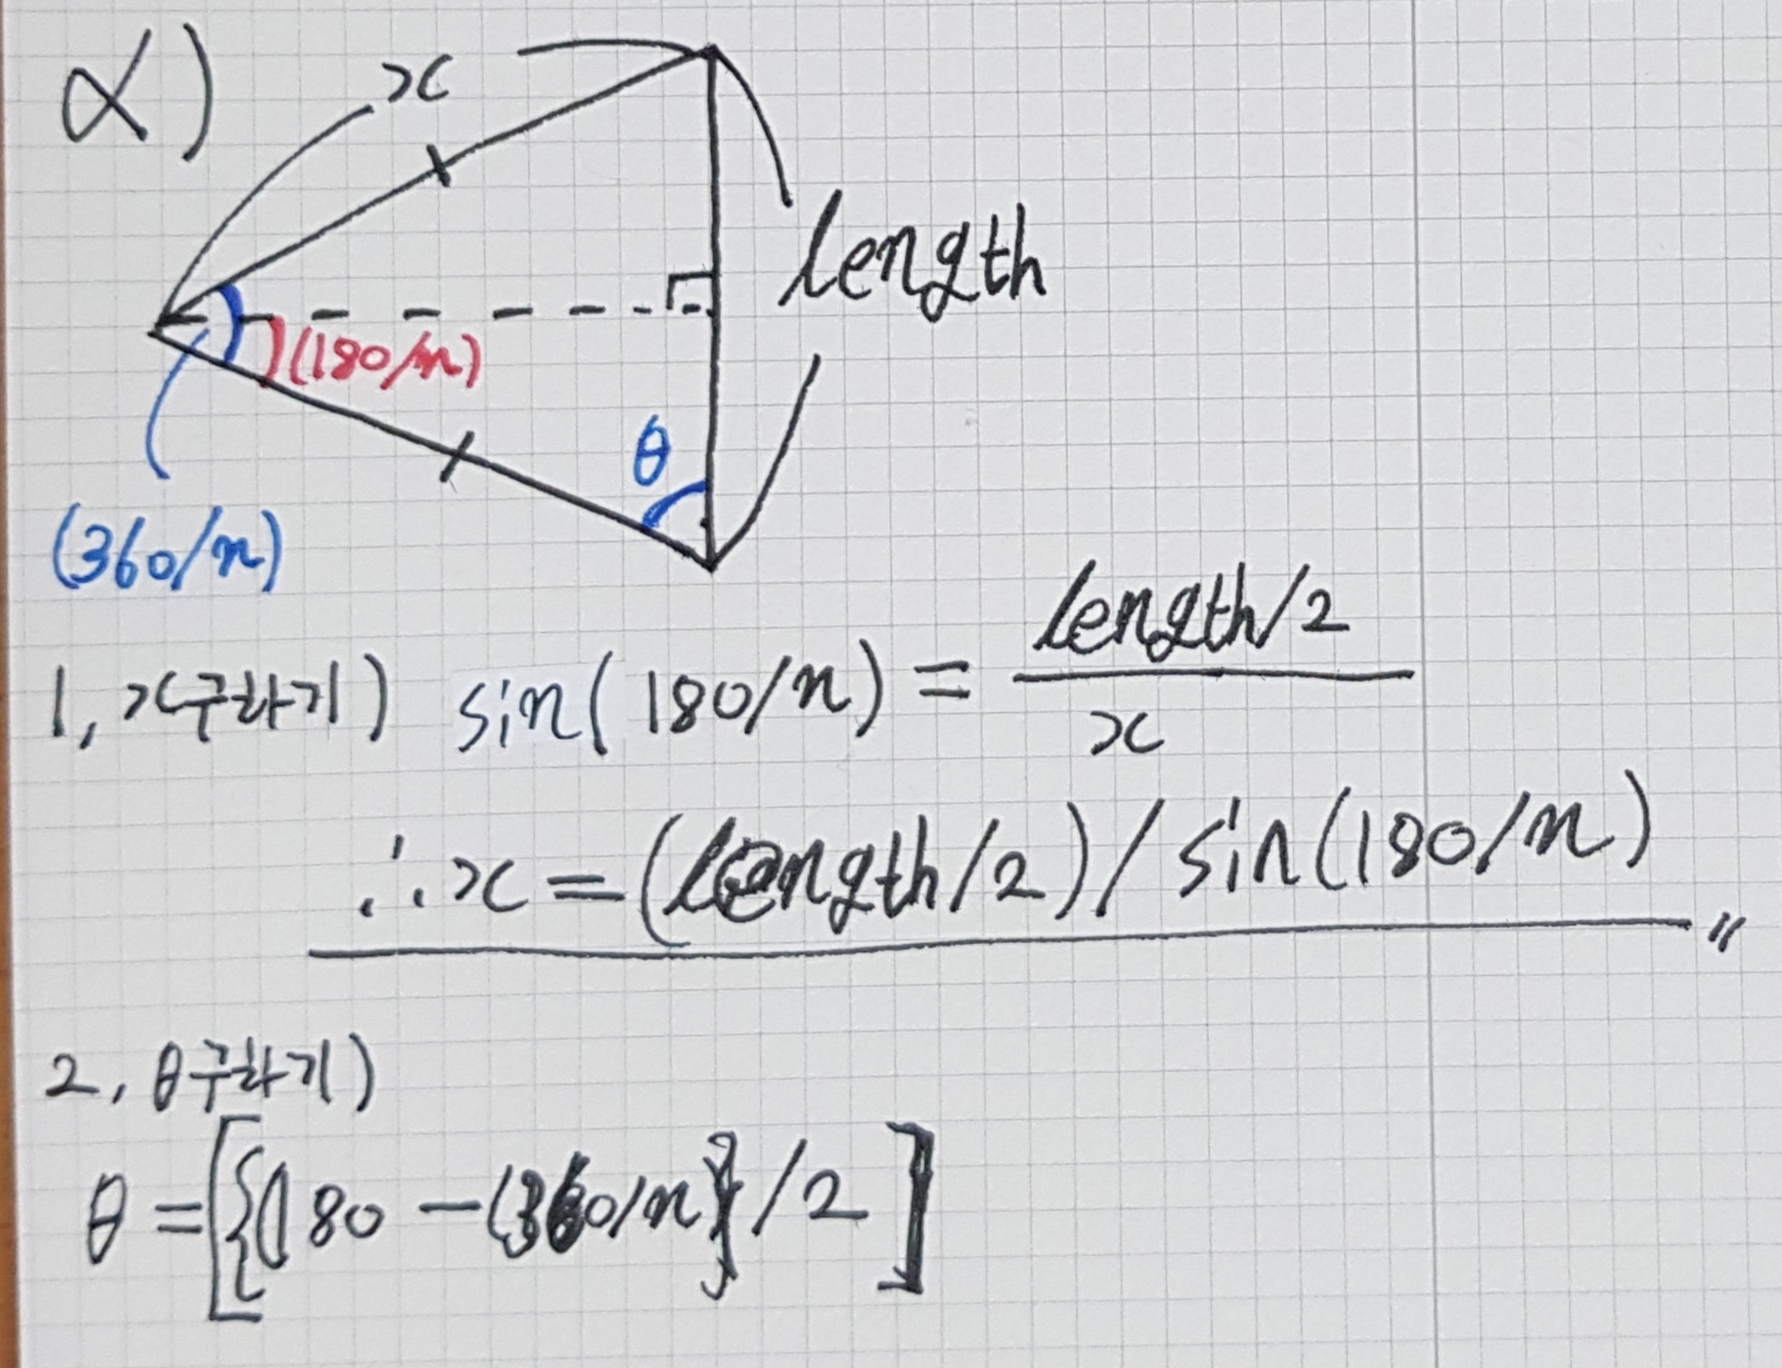

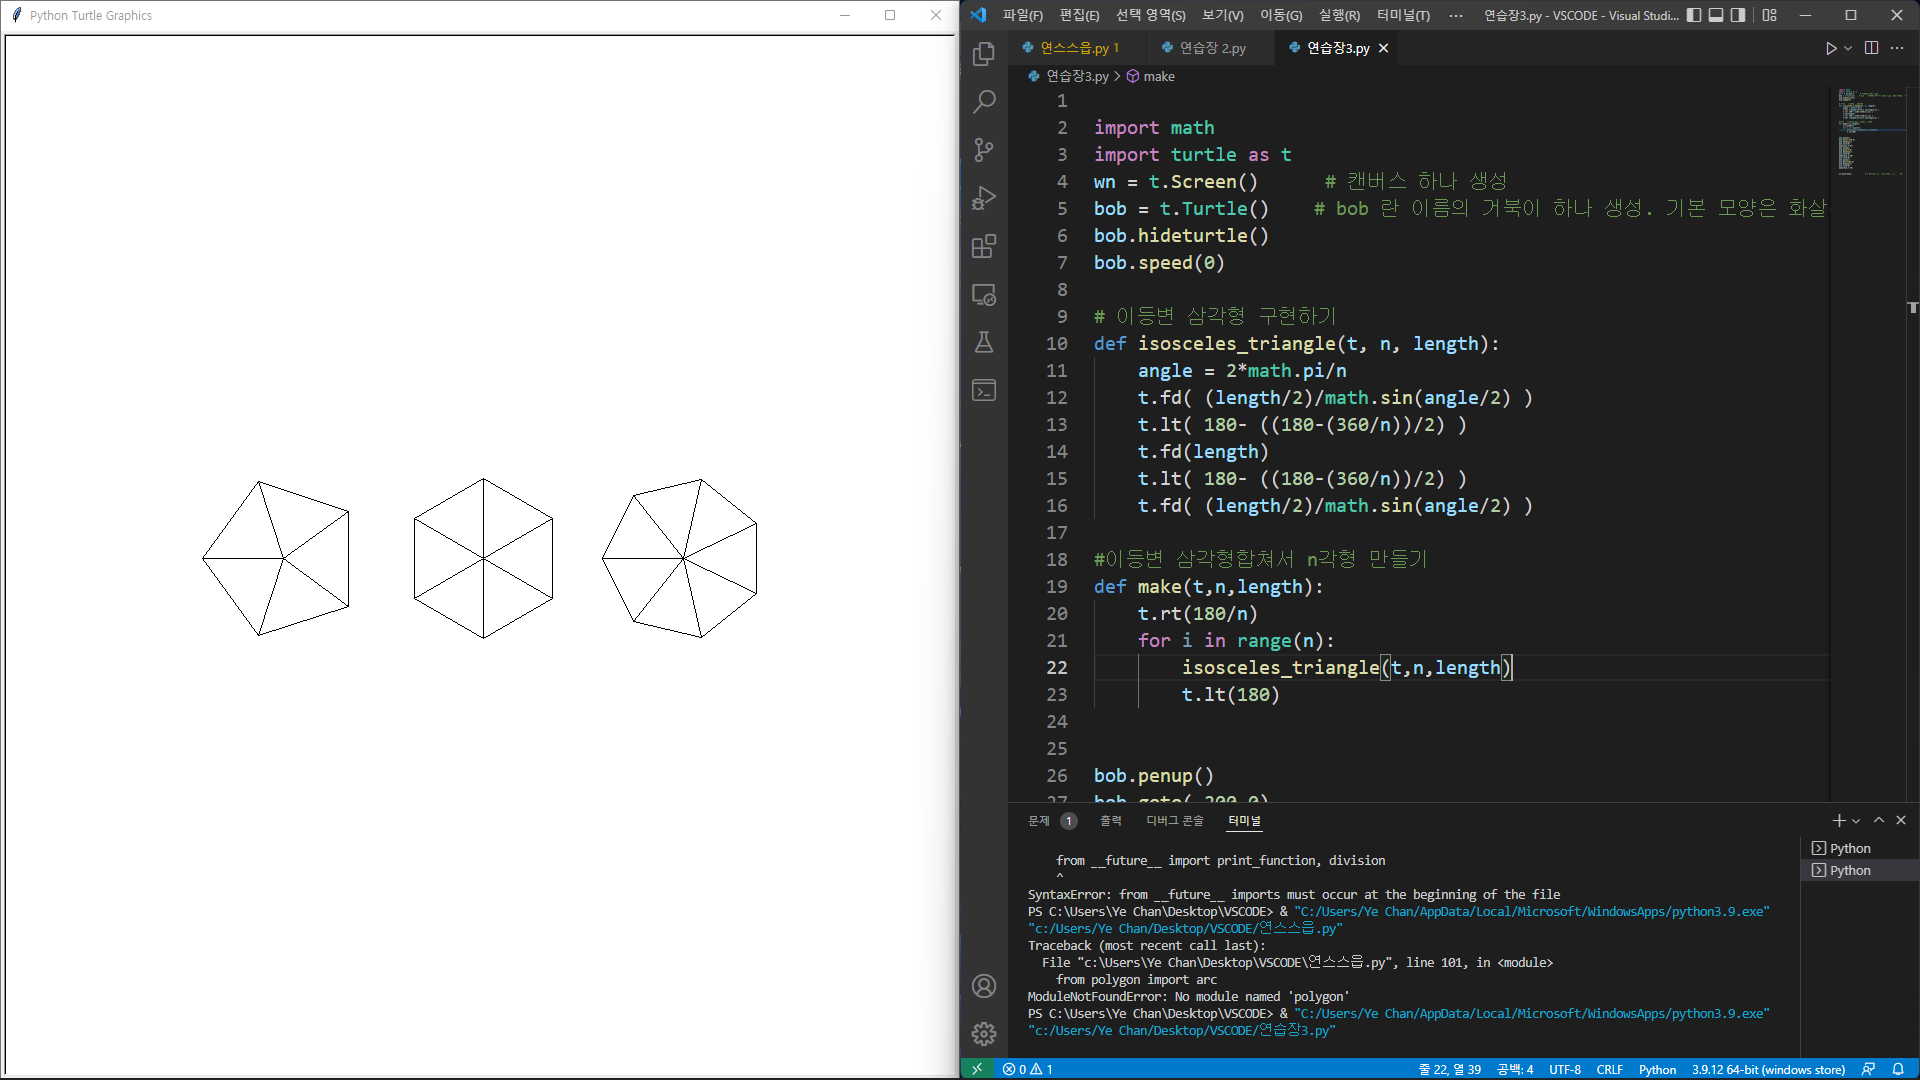

**문제 4**

[아르키메데스 와선(spiral)](https://ko.wikipedia.org/wiki/와선)을 
그리는 함수를 구현하라.
<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/pybook/master/jupyter-book/images/spiral.png" width="300"/></div>

<그림 출처: [wikipedia.org](https://ko.wikipedia.org/wiki/와선)>    

In [ ]:
import math
import turtle as t
wn = t.Screen()      # 캔버스 하나 생성
bob = t.Turtle()    # bob 란 이름의 거북이 하나 생성. 기본 모양은 화살촉
bob.hideturtle()
bob.speed(0)

def spiral(r,a,b):
  theta=0.0
  for i in range(r):
      x=math.cos(theta)*(a+b*theta)
      y=math.sin(theta)*(a+b*theta)

      bob.goto(x,y)
      theta+=0.1

spiral(190,0,5)

wn.mainloop()           

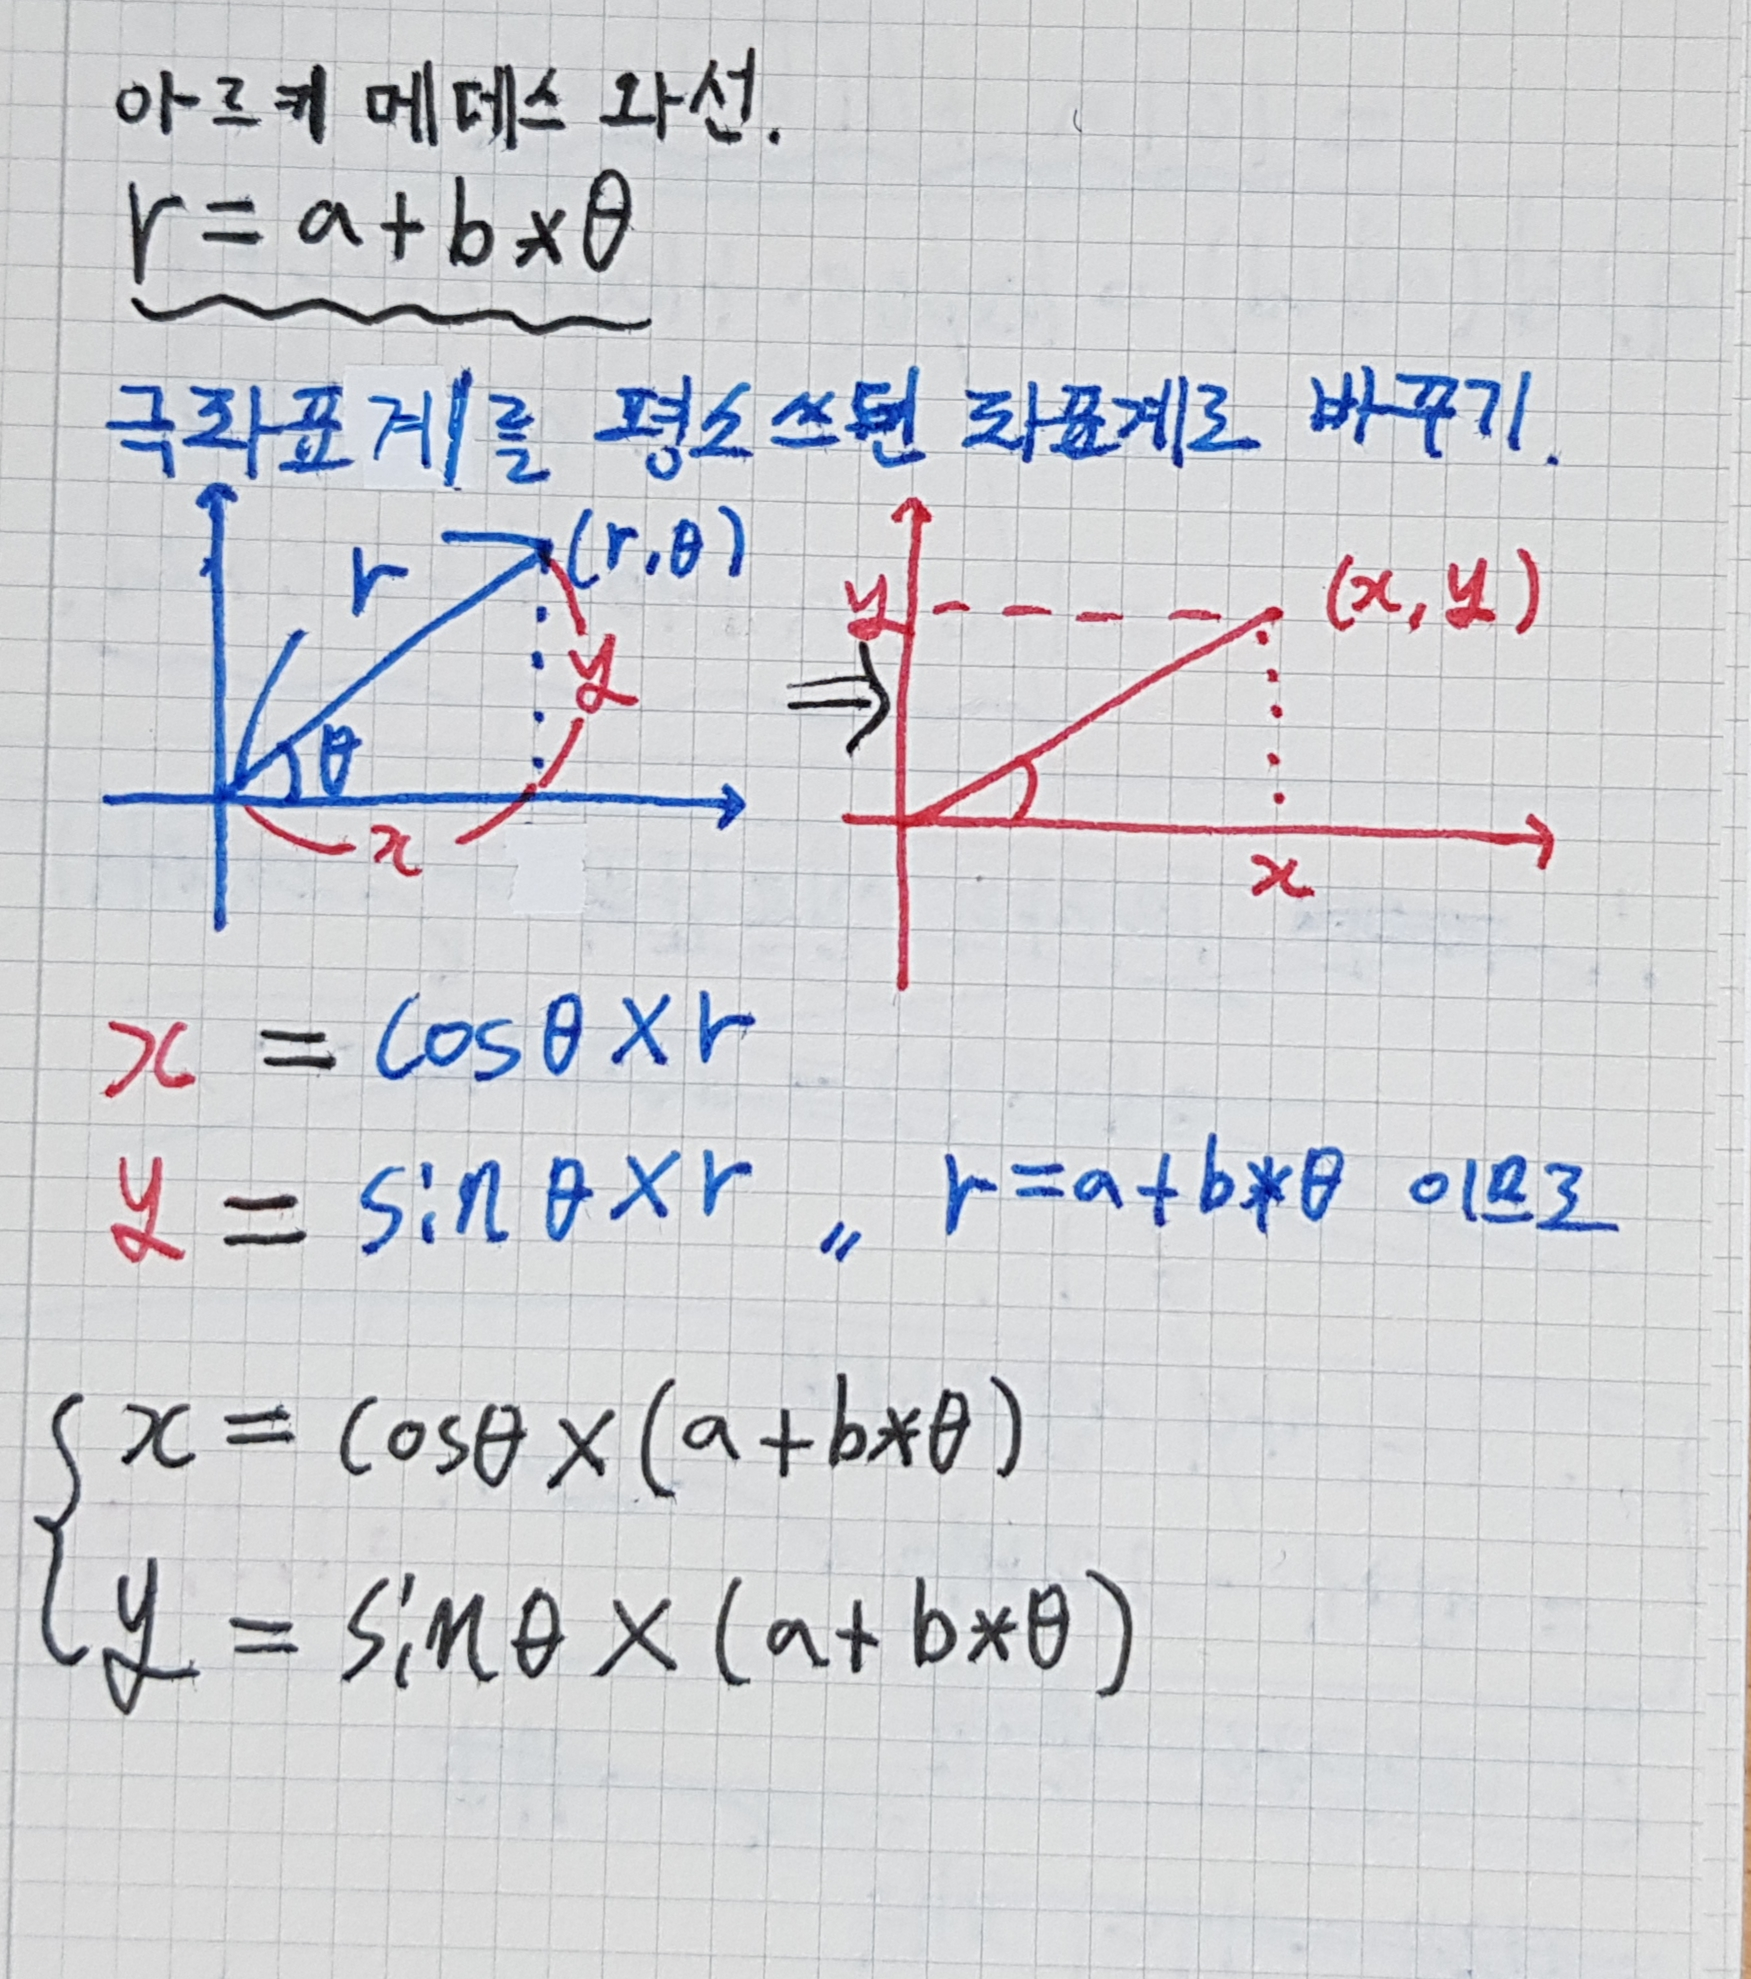

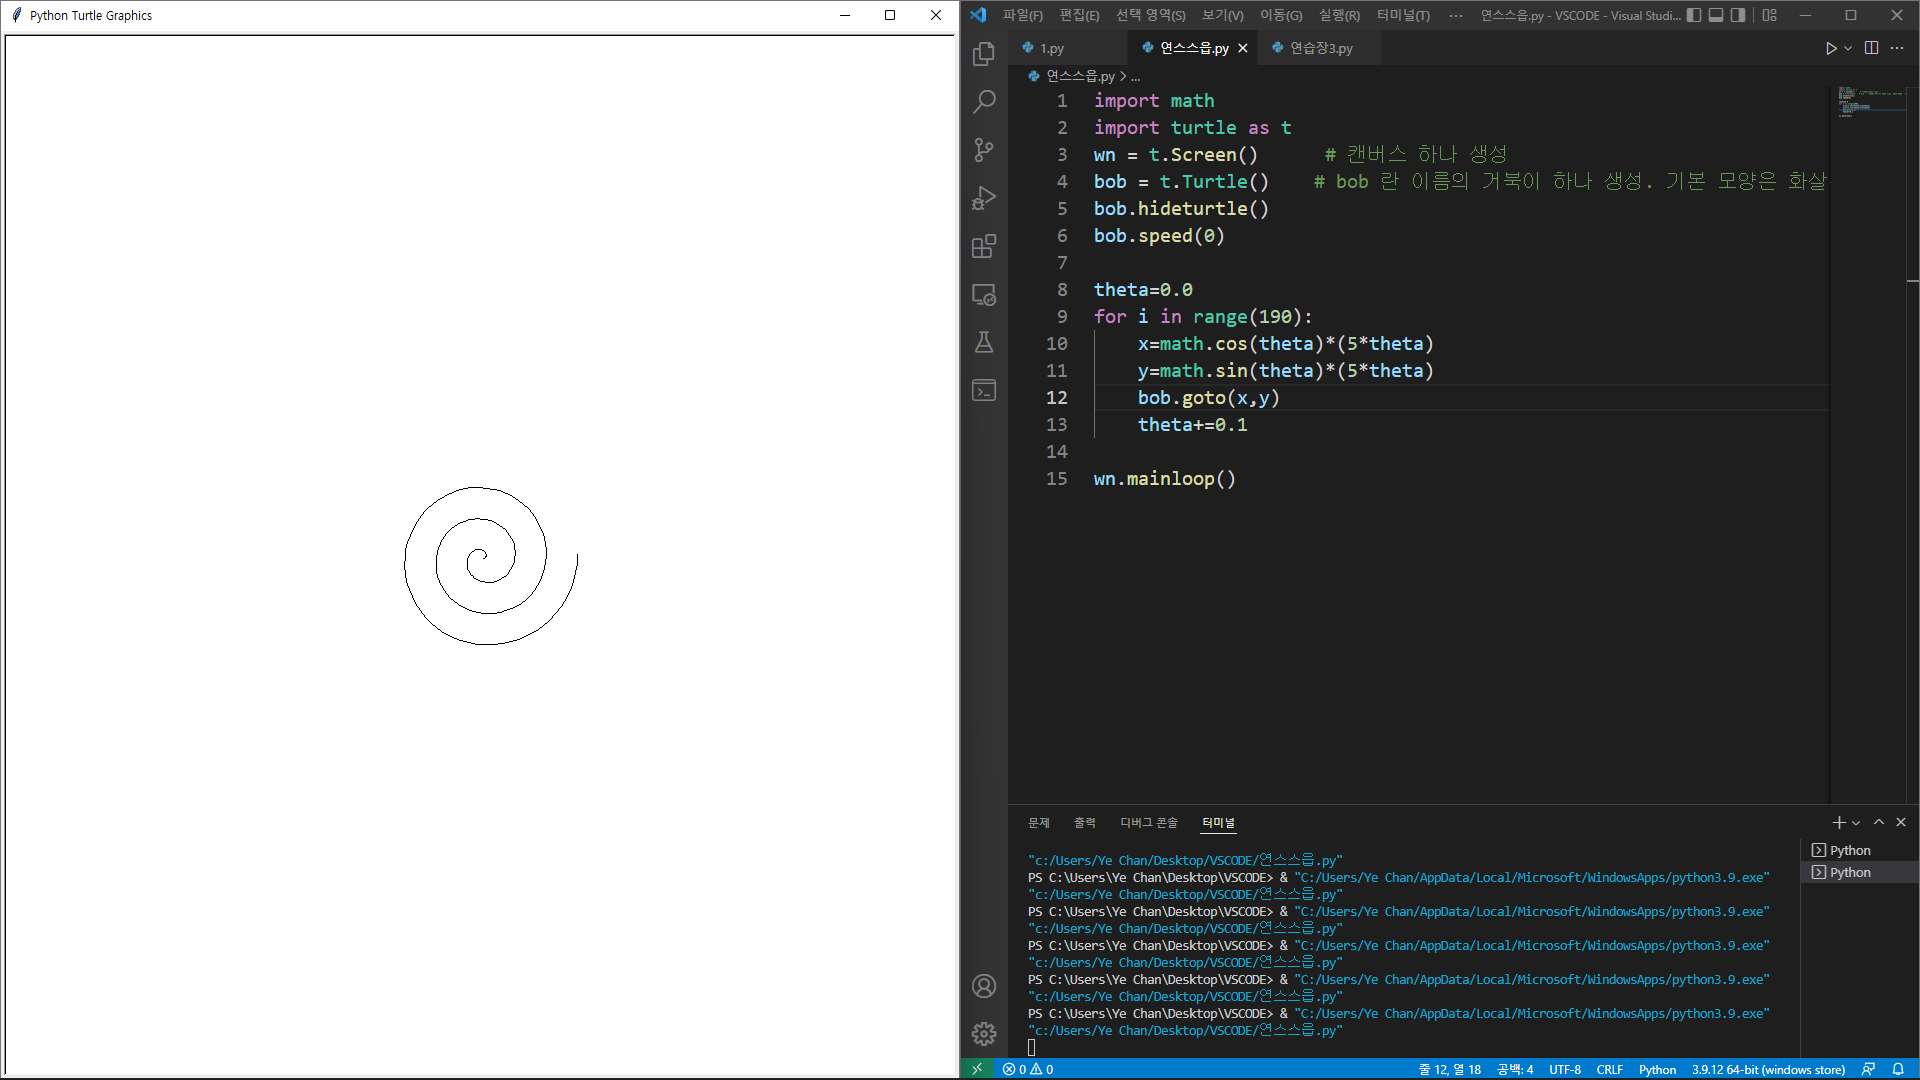

**문제 5**

[realpython.com](https://realpython.com/beginners-guide-python-turtle/#getting-started-with-turtle)에서 
소개한 프로그램이다. 

* 내용:
    * 두 마리의 거북이가 경주하는 게임
    * 동일 선상에 위치한 두 마리의 거북이가 목적지에 먼저 다다르도록 한다.
* 규칙:
    * 두 명이 번갈아 가며 주사위를 던진다.
    * 주사위 던지기 결과에 맞춰 거북이를 전진시킨다.
    * 목적지에 먼저 도달한 거북이가 승리한다.

작동 방식은 [realpython.com: 거북이 경주](https://files.realpython.com/media/Update_-_Turtle_Race_Green_and_Blue.b1ee6be37a9f.gif)
그림을 참고한다.
게임 구상은 다음과 같다.

1. 거북이 한 마리가 최종 목적지에 도달할 때 까지 무한 반복
1. 반복 내용
    * 두 마리중 한 마리가 목적지 도달 여부 판단
    * 아직 아무도 도착하지 않은 경우
        * 주사위 던지기
        * 던져진 주사위 결과만큼 해당 선수의 거북이 전진시키기
1. 필요한 프로그래밍 기본 요소
    * `if` 조건문: 경우에 따라 다른 행동 지시
    * `while` 반복문: 게임 종료 시까지 무한 반복
    * `random.choice`: 주사위 구현
        * 주사위 결과에 20 정도 곱한 값을 전진 거리로 사용할 것.

거북이 10마리가 참여하는 게임을 구현하라. 
단, `turtle` 모듈 이외의 다른 그래픽 관련 모듈은 사용할 수 없다.

힌트: 참고자료 몇 개를 언급하면 다음과 같다.

* Python Tutorial - Turtle Race Game 
    [1부](https://www.youtube.com/watch?v=qOsbvj87Uos),
    [2부](https://www.youtube.com/watch?v=AFqBlJurBnA)
* [Free Python Games](http://www.grantjenks.com/docs/freegames/)
* [Python Game Coding](http://christianthompson.com/blog/1)

In [ ]:
from random import randint
import turtle as t
wn = t.Screen()      # 캔버스 하나 생성
p_1 = t.Turtle()   
bob = t.Turtle()
bob.hideturtle()
bob.penup()
bob.goto(0,-330)
p_1.color("blue")
p_1.shape("turtle")

p_2=p_1.clone()
p_3=p_1.clone()
p_4=p_1.clone()
p_5=p_1.clone()
p_6=p_1.clone()
p_7=p_1.clone()
p_8=p_1.clone()
p_9=p_1.clone()
p_10=p_1.clone()

p_2.color("red")
p_3.color("green")
p_4.color("indigo")
p_5.color("gray")
p_6.color("red")
p_7.color("brown")
p_8.color("black")
p_9.color("orange")
p_10.color("blue")

p_1.speed(0)
p_1.penup()
p_1.goto(400,340)
p_1.pendown()
p_1.circle(20)
p_1.penup()
p_1.goto(-300,360)
p_1.pendown()
p_1.speed(3)

p_2.speed(0)
p_2.penup()
p_2.goto(400,280)
p_2.pendown()
p_2.circle(20)
p_2.penup()
p_2.goto(-300,300)
p_2.pendown()
p_2.speed(3)

p_3.speed(0)
p_3.penup()
p_3.goto(400,220)
p_3.pendown()
p_3.circle(20)
p_3.penup()
p_3.goto(-300,240)
p_3.pendown()
p_3.speed(3)

p_4.speed(0)
p_4.penup()
p_4.goto(400,160)
p_4.pendown()
p_4.circle(20)
p_4.penup()
p_4.goto(-300,180)
p_4.pendown()
p_4.speed(3)

p_5.speed(0)
p_5.penup()
p_5.goto(400,100)
p_5.pendown()
p_5.circle(20)
p_5.penup()
p_5.goto(-300,120)
p_5.pendown()
p_5.speed(3)

p_6.speed(0)
p_6.penup()
p_6.goto(400,40)
p_6.pendown()
p_6.circle(20)
p_6.penup()
p_6.goto(-300,60)
p_6.pendown()
p_6.speed(3)

p_7.speed(0)
p_7.penup()
p_7.goto(400,-20)
p_7.pendown()
p_7.circle(20)
p_7.penup()
p_7.goto(-300,0)
p_7.pendown()
p_7.speed(3)

p_8.speed(0)
p_8.penup()
p_8.goto(400,-80)
p_8.pendown()
p_8.circle(20)
p_8.penup()
p_8.goto(-300,-60)
p_8.pendown()
p_8.speed(3)

p_9.speed(0)
p_9.penup()
p_9.goto(400,-140)
p_9.pendown()
p_9.circle(20)
p_9.penup()
p_9.goto(-300,-120)
p_9.pendown()
p_9.speed(3)

p_10.speed(0)
p_10.penup()
p_10.goto(400,-200)
p_10.pendown()
p_10.circle(20)
p_10.penup()
p_10.goto(-300,-180)
p_10.pendown()
p_10.speed(3)

while 1: 
    p_1_dice=randint(1,6)
    p_1.fd(p_1_dice*4)
    
    p_2_dice=randint(1,6)
    p_2.fd(p_2_dice*4)

    p_3_dice=randint(1,6)
    p_3.fd(p_3_dice*4)

    p_4_dice=randint(1,6)
    p_4.fd(p_4_dice*4)

    p_5_dice=randint(1,6)
    p_5.fd(p_5_dice*4)

    p_6_dice=randint(1,6)
    p_6.fd(p_6_dice*4)

    p_7_dice=randint(1,6)
    p_7.fd(p_7_dice*4)

    p_8_dice=randint(1,6)
    p_8.fd(p_8_dice*4)

    p_9_dice=randint(1,6)
    p_9.fd(p_9_dice*4)

    p_10_dice=randint(1,6)
    p_10.fd(p_10_dice*4)
   
    if p_1.pos()>=(370,360):
        bob.write("Player - 1 win!" ,align="center", font=("",50))
        break
    elif p_2.pos()>=(370,300):
        bob.write("Player - 2 win!" ,align="center", font=("",50))
        break
    elif p_3.pos()>=(370,240):
        bob.write("Player - 3 win!" ,align="center", font=("",50))
        break
    elif p_4.pos()>=(370,180):
        bob.write("Player - 4 win!" ,align="center", font=("",50))
        break
    elif p_5.pos()>=(370,120):
        bob.write("Player - 5 win!" ,align="center", font=("",50))
        break
    elif p_6.pos()>=(370,60):
        bob.write("Player - 6 win!" ,align="center", font=("",50))
        break
    elif p_7.pos()>=(370,0):
        bob.write("Player - 7 win!" ,align="center", font=("",50))
        break
    elif p_8.pos()>=(370,-60):
        bob.write("Player - 8 win!" ,align="center", font=("",50))
        break
    elif p_9.pos()>=(370,-120):
        bob.write("Player - 9 win!" ,align="center", font=("",50))
        break
    elif p_10.pos()>=(370,-180):
        bob.write("Player - 10 win!" ,align="center", font=("",50))
        break


wn.mainloop() 

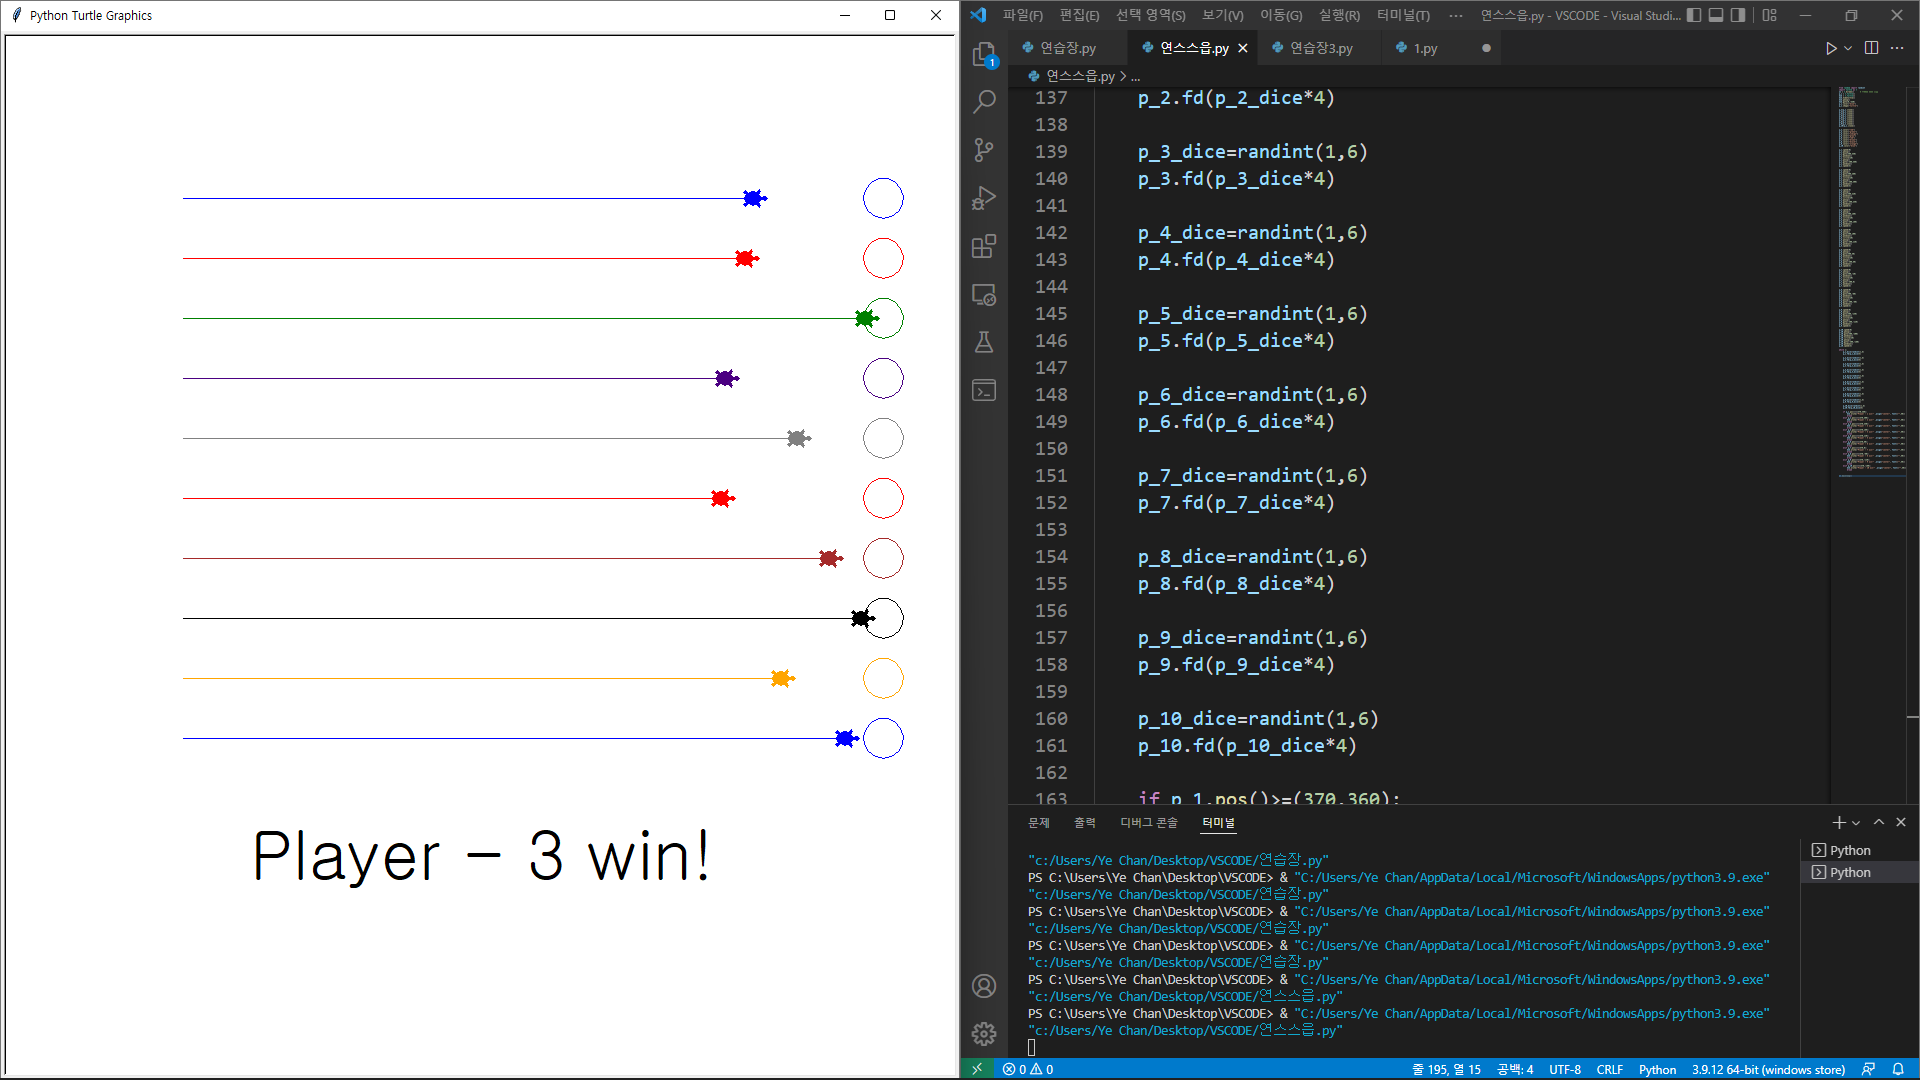